# Outlier Detection with PyOD

In [1]:
!pip install --upgrade pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190251 sha256=7123bffbe8b6b5718c646cfb4e44ebcbae067deb9b78be74dced54c29a1a5cf2
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


In [2]:
from pyod.models.knn import KNN   # KNN detector
from pyod.utils.data import generate_data
from pyod.utils.example import visualize

## Outlier Detection: People Heights

Suppose we have a dataset containing information about the heights of people in a population, and we want to detect potential outliers that might indicate measurement errors or exceptionally tall or short individuals.

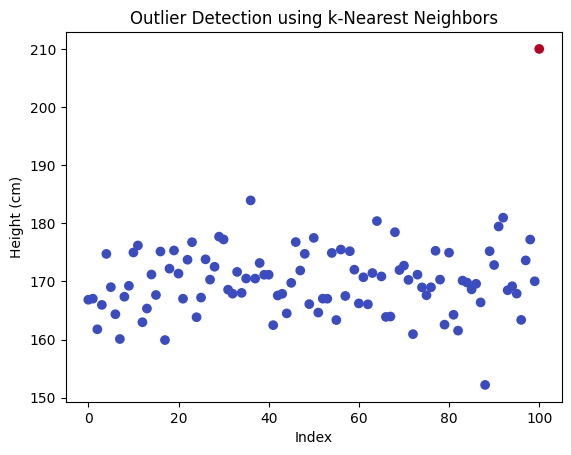

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data with one outlier
data = np.random.normal(170, 5, size=(100, 1))
data = np.append(data, [[210]], axis=0)

# Fit a k-Nearest Neighbors outlier detector
knn = KNN(n_neighbors=5, contamination=0.01)
knn.fit(data)

# Predict the outliers
outlier_predictions = knn.predict(data)

# Plot the data and the detected outlier
plt.scatter(range(len(data)), data, c=outlier_predictions, cmap=plt.cm.coolwarm)
plt.xlabel('Index')
plt.ylabel('Height (cm)')
plt.title('Outlier Detection using k-Nearest Neighbors')
plt.show()

In the above example, we generate a sample dataset containing the heights of people in a population, with one exceptionally tall individual (210 cm). We use the K-Nearest Neighbors (KNN) outlier detection method from the PyOD package to detect the outlier. The plot shows the data points with their indices, and the detected outlier is highlighted in a different color.

## Outlier Detection: Synthetic Data

In [12]:
# Generate sample data

contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

In [13]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# it is possible to get the prediction confidence as well
y_test_pred, y_test_pred_confidence = clf.predict(X_test, return_confidence=True)  # outlier labels (0 or 1) and confidence in the range of [0,1]

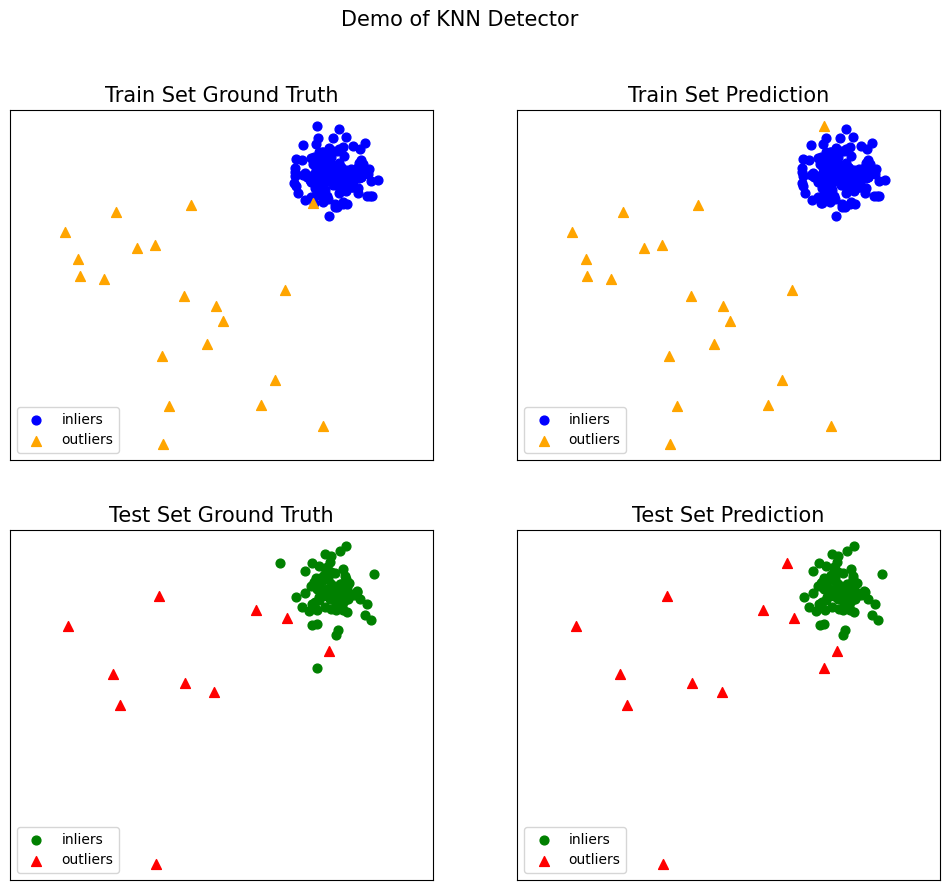

In [14]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

## Your Tasks

Try out different algorithms (Isolation Forest and LOF) for the above outlier detection problems (body heights and synthetic data). Are there any differences compared to KNN? Please do some analysis.

Don't forget to put your name and student ID.

**Name:** Daniel Christian Mandolang

**Student ID:** 2106630006

Make sure you type down your solutions below.

## LOF

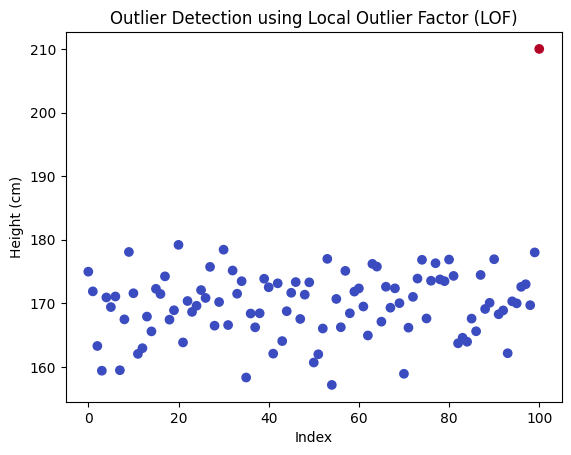

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.lof import LOF

# Fit a Local Outlier Factor (LOF) model
lof = LOF(n_neighbors=5, contamination=0.01)
lof.fit(data)

# Predict the outliers
outlier_predictions = lof.predict(data)

# Plot the data and the detected outliers
plt.scatter(range(len(data)), data, c=outlier_predictions, cmap=plt.cm.coolwarm)
plt.xlabel('Index')
plt.ylabel('Height (cm)')
plt.title('Outlier Detection using Local Outlier Factor (LOF)')
plt.show()


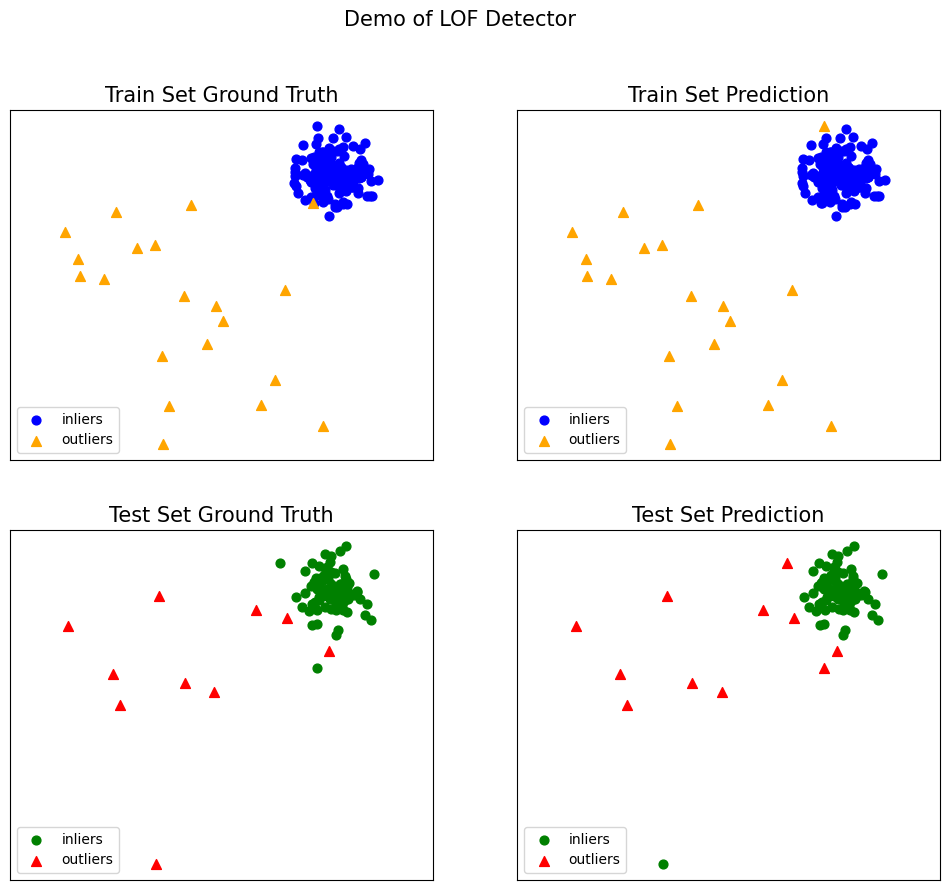

In [16]:
from pyod.models.lof import LOF

# Train LOF detector
clf_name = 'LOF'
clf = LOF()
clf.fit(X_train)

# Get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# Get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# Visualize the LOF results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)


## Isolation Forest

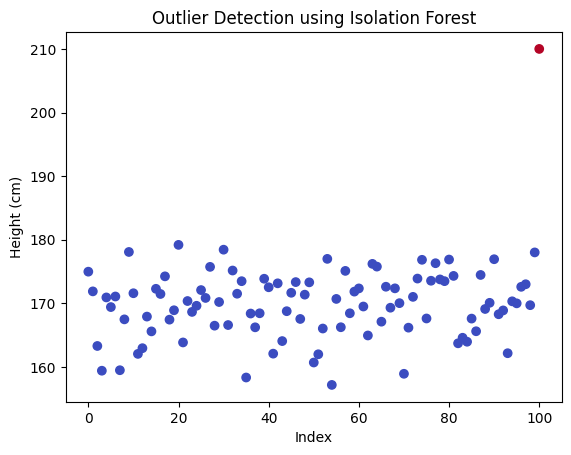

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Fit an Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(data)

# Predict the outliers (-1 for outliers, 1 for inliers)
outlier_predictions = iso_forest.predict(data)

# Map predictions to 0 (inliers) and 1 (outliers) for consistent coloring with previous examples
outlier_predictions = (outlier_predictions == -1).astype(int)

# Plot the data and the detected outliers
plt.scatter(range(len(data)), data, c=outlier_predictions, cmap=plt.cm.coolwarm)
plt.xlabel('Index')
plt.ylabel('Height (cm)')
plt.title('Outlier Detection using Isolation Forest')
plt.show()


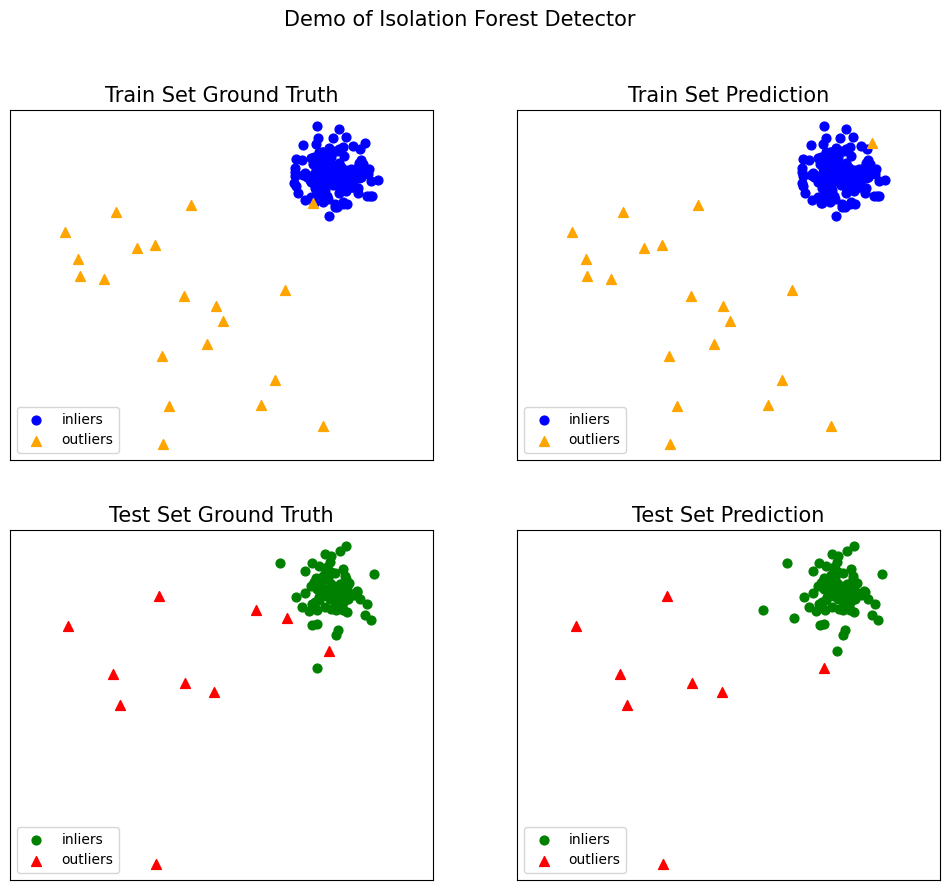

In [17]:
from pyod.models.iforest import IForest

# Train Isolation Forest detector
clf_name = 'Isolation Forest'
clf = IForest()
clf.fit(X_train)

# Get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# Get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# Visualize the Isolation Forest results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)


### Difference Analysis

1. Prediction Discrepancy on Test Set:

  - In the LOF results, we see that the LOF model has labeled several points as outliers in the test set (red triangles), which align with the ground truth labels. However, there are a few instances where the LOF model has labeled points as inliers (blue circles) that are labeled as outliers in the ground truth.
  - In the Isolation Forest results, the model seems to have labeled a different set of points as outliers in the test set compared to LOF, and there are fewer discrepancies between the Isolation Forest predictions and the ground truth.
2. Prediction Pattern:
  - The LOF algorithm appears to be more conservative in marking outliers in the training set, as there are fewer outliers detected.
  - On the other hand, the Isolation Forest seems to be more aggressive in marking outliers, as more points are labeled as such.
3. Consistency Between Training and Test Predictions:
  - The LOF algorithm shows a certain consistency in the prediction of outliers in both the training and testing sets. The points it predicts as outliers are visually further from the cluster of inlier points.
  - Isolation Forest, while aggressive, also shows consistency in the prediction of outliers, marking those far from the dense areas as outliers.

These differences can be attributed to the underlying mechanisms of each algorithm:
- LOF: It measures the local density deviation of a given data point with respect to its neighbors. It is more sensitive to the local properties of data, which can result in different behavior in regions of varying density.
- Isolation Forest: It works by isolating anomalies instead of profiling normal data points. It is based on the fact that anomalies are 'few and different,' which makes them more susceptible to isolation. This method is typically less influenced by the local density and is more global in its approach.

References:
- https://pyod.readthedocs.io/en/latest/example.html
- https://saturncloud.io/glossary/outlier-detection/